In [1089]:
import pandas as pd
import numpy as np
import json
import requests
import webbrowser
import datetime
import matplotlib.pyplot as plt

In [1048]:
%cd ~/dev/repos/ml_dev/projects/strava/

/Users/talilaserson/dev/repos/ml_dev/projects/strava


# global variables #

In [1163]:
today_date = pd.to_datetime(pd.to_datetime("today").strftime('%Y-%m-%d'))
today_date

Timestamp('2020-05-04 00:00:00')

# url / api setup and  management #

In [1049]:
## fixed variables ##

# account attributes
client_id = 47024
client_secret = '3f400090c567b1daf4f636ae5353cdd1f08510e8'
athlete_id = '49503364'
# athlete_id = '49502501'

# url components
base = 'https://www.strava.com/api/v3/'
request_type_profile = 'athletes'
request_type_activies = 'athlete/activities'
request_type_clubs = 'clubs/575016/activities'


In [1044]:
# get code #

# access_token management resources:
### 1) https://yizeng.me/2017/01/11/get-a-strava-api-access-token-with-write-permission/
### 2) http://developers.strava.com/docs/authentication/

url = 'http://www.strava.com/oauth/authorize?client_id=47024&response_type=code&redirect_uri=http://localhost/exchange_token&approval_prompt=force&scope=profile:read_all,activity:read_all'
                
webbrowser.open(url)

True

In [1050]:
## declare code ##
code = '7633a68feedaa68b0f28f96878b8f40373ae0aff'

In [1051]:
%%bash
curl -X POST https://www.strava.com/api/v3/oauth/token \
  -d client_id=47024 \
  -d client_secret=3f400090c567b1daf4f636ae5353cdd1f08510e8 \
  -d code=7633a68feedaa68b0f28f96878b8f40373ae0aff \
  -d grant_type=authorization_code

{"token_type":"Bearer","expires_at":1588659565,"expires_in":21600,"refresh_token":"0cdfbcf12759af8c0be8f3d775450ae916457891","access_token":"190bdf01b923f5ac595a1ba5cb4223d3978490fb","athlete":{"id":49503364,"username":null,"resource_state":2,"firstname":"N","lastname":"F","city":null,"state":null,"country":null,"sex":"M","premium":false,"summit":false,"created_at":"2020-01-02T17:12:40Z","updated_at":"2020-04-30T11:51:35Z","badge_type_id":0,"profile_medium":"avatar/athlete/medium.png","profile":"avatar/athlete/large.png","friend":null,"follower":null}}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   704    0   558  100   146    811    212 --:--:-- --:--:-- --:--:--   812


In [1052]:
# %%bash
# curl -X POST https://www.strava.com/api/v3/oauth/token \
#   -d client_id=47024 \
#   -d client_secret=3f400090c567b1daf4f636ae5353cdd1f08510e8 \
#   -d grant_type=refresh_token \
#   -d refresh_token=0cdfbcf12759af8c0be8f3d775450ae916457891

{"token_type":"Bearer","access_token":"190bdf01b923f5ac595a1ba5cb4223d3978490fb","expires_at":1588659565,"expires_in":21581,"refresh_token":"0cdfbcf12759af8c0be8f3d775450ae916457891"}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   333    0   183  100   150    269    221 --:--:-- --:--:-- --:--:--   270


In [1053]:
# decalre access token #

access_token = '190bdf01b923f5ac595a1ba5cb4223d3978490fb'

# profile #

In [1054]:
# profile url
url_profile = base + request_type_profile + '/' +  athlete_id + '/?access_token=' + access_token
print(url_profile)

https://www.strava.com/api/v3/athletes/49503364/?access_token=190bdf01b923f5ac595a1ba5cb4223d3978490fb


In [1055]:
response_profile = json.loads(requests.get(url_profile).text)
response_profile

{'id': 49503364,
 'username': None,
 'resource_state': 3,
 'firstname': 'N',
 'lastname': 'F',
 'city': None,
 'state': None,
 'country': None,
 'sex': 'M',
 'premium': False,
 'summit': False,
 'created_at': '2020-01-02T17:12:40Z',
 'updated_at': '2020-04-30T11:51:35Z',
 'badge_type_id': 0,
 'profile_medium': 'avatar/athlete/medium.png',
 'profile': 'avatar/athlete/large.png',
 'friend': None,
 'follower': None,
 'follower_count': 4,
 'friend_count': 4,
 'mutual_friend_count': 0,
 'athlete_type': 1,
 'date_preference': '%m/%d/%Y',
 'measurement_preference': 'feet',
 'clubs': [{'id': 575016,
   'resource_state': 2,
   'name': 'LaserSons 365',
   'profile_medium': 'https://dgalywyr863hv.cloudfront.net/pictures/clubs/575016/13378918/2/medium.jpg',
   'profile': 'https://dgalywyr863hv.cloudfront.net/pictures/clubs/575016/13378918/2/large.jpg',
   'cover_photo': 'https://dgalywyr863hv.cloudfront.net/pictures/clubs/575016/13378952/2/large.jpg',
   'cover_photo_small': 'https://dgalywyr863hv

# activities #

In [1056]:
# activites url
result_limit = '&per_page=200'
url_activites = base + request_type_activies + '/?access_token=' + access_token + result_limit
print(url_activites)

https://www.strava.com/api/v3/athlete/activities/?access_token=190bdf01b923f5ac595a1ba5cb4223d3978490fb&per_page=200


In [1057]:
activities = pd.read_json(url_activites)

In [1058]:
activities.rename(columns = {'distance':'distance_klm'},inplace = True)

# unit conversion
activities['distance_klm'] = activities['distance_klm'] / 1000
activities['distance_miles'] = activities['distance_klm'] / 1.60934

activities['elapsed_time_seconds'] = activities['elapsed_time']
activities['elapsed_time_minutes'] = activities['elapsed_time_seconds'] / 60
activities['elapsed_time_hours'] = activities['elapsed_time_minutes'] / 60

# datetime parsing
activities['activity_date'] = pd.to_datetime(activities['start_date']).dt.strftime('%Y-%m-%d')

activities.head()

,resource_state,athlete,name,distance_klm,moving_time,elapsed_time,total_elevation_gain,type,workout_type,id,...,elev_high,elev_low,pr_count,total_photo_count,has_kudoed,distance_miles,elapsed_time_seconds,elapsed_time_minutes,elapsed_time_hours,activity_date
0,2,"{'id': 49503364, 'resource_state': 1}",CHQ Sunday morning run,6.8262,2038,2041,72.1,Run,0.0,3392135207,...,430.0,399.7,1,0,False,4.241615,2041,34.016667,0.566944,2020-05-03
1,2,"{'id': 49503364, 'resource_state': 1}",CHQ run,3.6551,1114,1117,34.2,Run,0.0,3382277530,...,420.9,400.2,0,0,False,2.271179,1117,18.616667,0.310278,2020-05-01
2,2,"{'id': 49503364, 'resource_state': 1}",Tuesday evening run,4.4510,1379,1379,32.0,Run,0.0,3368217100,...,359.8,345.6,0,0,False,2.765730,1379,22.983333,0.383056,2020-04-28
3,2,"{'id': 49503364, 'resource_state': 1}",Sunday afternoon run,6.4479,2116,2127,50.9,Run,0.0,3358711405,...,368.4,341.6,0,0,False,4.006549,2127,35.450000,0.590833,2020-04-26
4,2,"{'id': 49503364, 'resource_state': 1}",Thursday evening run,3.3726,1019,1019,24.7,Run,0.0,3343537648,...,359.8,348.4,0,0,False,2.095642,1019,16.983333,0.283056,2020-04-23


In [1059]:
days_elapsed = pd.to_datetime(pd.to_datetime("today").strftime('%Y-%m-%d')) - pd.to_datetime(pd.to_datetime("2020-01-01").strftime('%Y-%m-%d'))
days_elapsed.days

124

In [1060]:
days_elapsed.days / 365

0.33972602739726027

In [1061]:
sum(activities['distance_miles'])

129.85577938782362

In [1062]:
len(activities)

46

### daily performance ###

In [1382]:
performance_daily = activities[['activity_date','distance_miles','elapsed_time_hours']].groupby('activity_date').sum().reset_index()
performance_daily.rename(columns = {'activity_date':'date'}, inplace = True)
performance_daily['date'] = pd.to_datetime(performance['date'])
performance_daily.head()

,date,distance_miles,elapsed_time_hours
0,2020-01-03,2.000075,0.283333
1,2020-01-08,1.000037,0.133333
2,2020-01-14,1.000037,0.133333
3,2020-01-18,1.000037,0.150000
4,2020-01-20,1.000037,0.133333


## dataframe construction ##

In [1383]:
# create list of every day in the year in YYYY-MM-DD format

date_series = pd.date_range(start ='2020-01-01',  end = '2020-12-31', freq ='1D') 
date_series[0:5]

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05'],
              dtype='datetime64[ns]', freq='D')

In [1384]:
# create list of every day's month in YYYY-MM format

month_series = date_series.to_period('M')
month_series[0:5]

PeriodIndex(['2020-01', '2020-01', '2020-01', '2020-01', '2020-01'], dtype='period[M]', freq='M')

In [1385]:
# create list of integers representing the day of the month (i.e. 2020-01-01 will have a value of 1 etc.)

month_day = date_series.day
month_day[0:5]

Int64Index([1, 2, 3, 4, 5], dtype='int64')

In [1386]:
# create list of integers representing the day of the year (i.e. 2020-02-01 will have a value of 32 etc.)

year_day = np.arange(len(date_series))
year_day = year_day + 1 # make first day of the year 1, not 0
year_day[0:5]

array([1, 2, 3, 4, 5])

In [1387]:
# create integer representing the day of the year (i.e. 2020-02-01 will have a value of 32 etc.)

distance_requirement_miles = np.arange(len(date_series))
distance_requirement_miles = distance_requirement_miles + 1 # make first day of the year 1, not 0
distance_requirement_miles[0:5]

array([1, 2, 3, 4, 5])

In [1388]:
df = pd.DataFrame(list(zip(date_series,month_series,year_day,month_day,distance_requirement_miles)), columns =['date','month','year_day','month_day','distance_requirement_miles'])
df.head()

,date,month,year_day,month_day,distance_requirement_miles
0,2020-01-01,2020-01,1,1,1
1,2020-01-02,2020-01,2,2,2
2,2020-01-03,2020-01,3,3,3
3,2020-01-04,2020-01,4,4,4
4,2020-01-05,2020-01,5,5,5


In [1389]:
df = df.merge(performance_daily, how = 'left', left_on = 'date', right_on = 'date')
df_copy = df.copy() # save for monthly performance metrics further beow
df.head()

,date,month,year_day,month_day,distance_requirement_miles,distance_miles,elapsed_time_hours
0,2020-01-01,2020-01,1,1,1,NaN,NaN
1,2020-01-02,2020-01,2,2,2,NaN,NaN
2,2020-01-03,2020-01,3,3,3,2.000075,0.283333
3,2020-01-04,2020-01,4,4,4,NaN,NaN
4,2020-01-05,2020-01,5,5,5,NaN,NaN


In [1390]:
# add cumulative fields to the dataframe

df = df.fillna(0) # first, zero out any null values so that the data is continuous

# distance

df['cum_distance_miles_year'] = df['distance_miles'].cumsum()
df['cum_distance_miles_month'] = df.groupby(['month'])['distance_miles'].cumsum()

# time

df['cum_time_month'] = df.groupby(['month'])['elapsed_time_hours'].cumsum()
df['cum_time_year'] = df['elapsed_time_hours'].cumsum()

df.head()

,date,month,year_day,month_day,distance_requirement_miles,distance_miles,elapsed_time_hours,cum_distance_miles_year,cum_distance_miles_month,cum_time_month,cum_time_year
0,2020-01-01,2020-01,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-01-02,2020-01,2,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020-01-03,2020-01,3,3,3,2.000075,0.283333,2.000075,2.000075,0.283333,0.283333
3,2020-01-04,2020-01,4,4,4,0.000000,0.000000,2.000075,2.000075,0.283333,0.283333
4,2020-01-05,2020-01,5,5,5,0.000000,0.000000,2.000075,2.000075,0.283333,0.283333


# visualizing my performance #

### tracking my progress vs the year's progress ###

In [1391]:
# filter for just dates that have happened
df_plot = df[df['date'] <= today_date]

# grab just the columns we need
df_plot = df_plot[['distance_requirement_miles','cum_distance_miles_year']]

# preview output
df_plot.head()

,distance_requirement_miles,cum_distance_miles_year
0,1,0.000000
1,2,0.000000
2,3,2.000075
3,4,2.000075
4,5,2.000075


Text(0.5, 1.0, 'Cumulative distance run in 2020 vs. daily pace')

<Figure size 720x720 with 0 Axes>

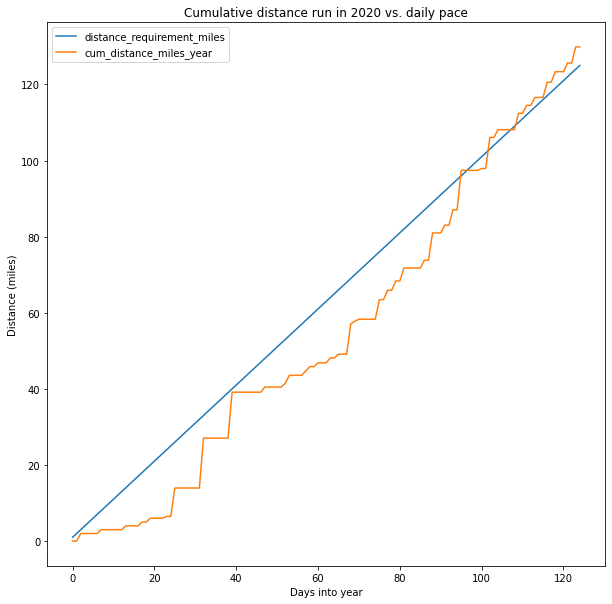

In [1392]:
plt.figure()

plt.rcParams["figure.figsize"] = (10,10)

df_plot.plot()

plt.xlabel('Days into year')
plt.ylabel('Distance (miles)')
plt.title('Cumulative distance run in 2020 vs. daily pace')

### tracking month over month cumulative distance run ###

In [1393]:
# filter for just dates that have happened
df_plot = df[df['date'] <= today_date]

# grab just the columns we need
df_plot = df_plot[['month','month_day','cum_distance_miles_month']]

# manipulate dataset to fit plot format
df_plot = df_plot.pivot(index = 'month_day', columns = 'month', values = 'cum_distance_miles_month')

# preview output
df_plot.head()

month,2020-01,2020-02,2020-03,2020-04,2020-05
month_day,,,,,
1,0.000000,0.000000,0.992208,2.048355,2.271179
2,0.000000,13.102452,0.992208,2.048355,2.271179
3,2.000075,13.102452,0.992208,6.079014,6.512794
4,2.000075,13.102452,2.271242,6.079014,6.512794
5,2.000075,13.102452,2.271242,16.441088,NaN


Text(0.5, 1.0, 'Cumulative distance run in each month')

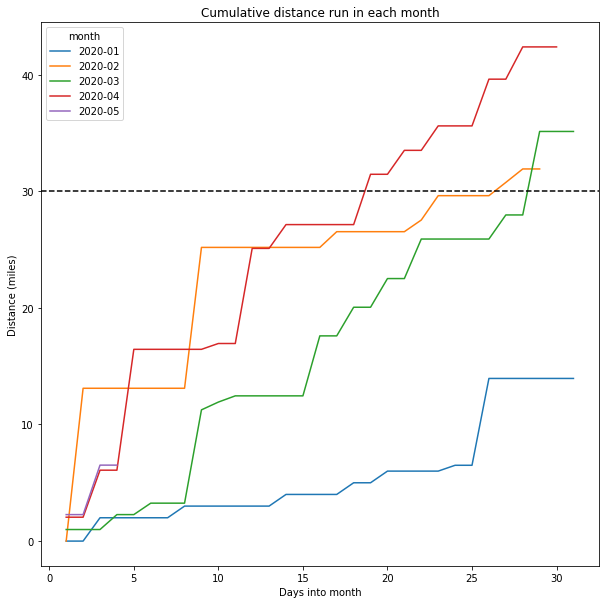

In [1407]:
# plt.figure()

df_plot.plot()

# monthly_goal
plt.axhline(y=30, color='black', linestyle='--')

plt.rcParams["figure.figsize"] = (10,10)

plt.xlabel('Days into month')
plt.ylabel('Distance (miles)')
plt.title('Cumulative distance run in each month')

# summary metrics by month #

In [1398]:
performance_monthly = df[['month']].drop_duplicates().reset_index().drop(columns = 'index')

In [1399]:
for i in range(len(performance_monthly['month'])):

    # decalre month #
    month = performance_monthly.iloc[i]['month']
    
#     ### per run stats ###
    
#     # distance metrics    
    performance_monthly.loc[i,'total_runs'] = df[df['month'] == month][['distance_miles']].count().values
    performance_monthly.loc[i,'total_distance'] = df[df['month'] == month][['distance_miles']].sum().values
    performance_monthly.loc[i,'longest_run_distance'] = df[df['month'] == month][['distance_miles']].max().values
    performance_monthly.loc[i,'avg_distance_per_run'] = df[df['month'] == month][['distance_miles']].mean().values

#     # time metrics #
    performance_monthly.loc[i,'total_time'] = df[df['month'] == month][['elapsed_time_hours']].sum().values
    performance_monthly.loc[i,'longest_run_time'] = df[df['month'] == month][['elapsed_time_hours']].max().values
    performance_monthly.loc[i,'avg_time_per_run'] = df[df['month'] == month][['elapsed_time_hours']].mean().values

#     # fill in Na values with 0s (affect is felt with mean and min metrics)
#     df_copy.fillna(0, inplace = True)

#     ### per day stats ###

#     # distance metrics #
#     performance_monthly.loc[i,'avg_distance_per_day'] = df_copy[df_copy['month'] == month][['distance_miles']].mean().values

#     # time metrics #
#     performance_monthly.loc[i,'avg_time_per_day'] = df_copy[df_copy['month'] == month][['elapsed_time_hours']].mean().values


In [1400]:
performance_monthly

,month,total_runs,total_distance,longest_run_distance,avg_distance_per_run,total_time,longest_run_time,avg_time_per_run
0,2020-01,31.0,13.945158,7.444915,0.449844,1.934167,1.034167,0.062392
1,2020-02,29.0,31.906434,13.102452,1.100222,4.891111,1.958333,0.168659
2,2020-03,31.0,35.121168,8.000050,1.132941,5.070556,1.172778,0.163566
3,2020-04,30.0,42.370226,10.362074,1.412341,6.126389,1.538333,0.204213
4,2020-05,31.0,6.512794,4.241615,0.210090,0.877222,0.566944,0.028297
5,2020-06,30.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2020-07,31.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2020-08,31.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,2020-09,30.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2020-10,31.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# clubs #

In [1215]:
# clubs url
result_limit = '&page=1&per_page=200'
url_clubs = base + request_type_clubs + '?access_token=' + access_token + result_limit
print(url_clubs)

https://www.strava.com/api/v3/clubs/575016/activities?access_token=190bdf01b923f5ac595a1ba5cb4223d3978490fb&page=1&per_page=200


In [1216]:
clubs = pd.read_json(url_clubs)
len(clubs)

83

In [1217]:
clubs['first_name'] = ''
clubs['last_name'] = ''

for i in range(len(clubs)):    
    clubs['first_name'][i] = clubs['athlete'][i]['firstname']
    clubs['last_name'][i] = clubs['athlete'][i]['lastname']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1221]:
clubs.tail()

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,workout_type,first_name,last_name
78,2,"{'resource_state': 2, 'firstname': 'Tali', 'la...",Catching up from sick days!,4833.4,1622,1691,56.5,Run,0.0,Tali,L.
79,2,"{'resource_state': 2, 'firstname': 'Jannah', '...",Gorgeous day!,5648.7,2195,2205,7.6,Run,0.0,Jannah,K.
80,2,"{'resource_state': 2, 'firstname': 'Steven', '...",Post Shabbat indoor track,5632.7,1933,1933,0.0,Run,0.0,Steven,L.
81,2,"{'resource_state': 2, 'firstname': 'N', 'lastn...",Run from gym to TJ,757.8,237,246,0.0,Run,0.0,N,F.
82,2,"{'resource_state': 2, 'firstname': 'N', 'lastn...",Run to gym,820.7,265,270,3.9,Run,0.0,N,F.


In [1219]:
clubs[['first_name']].groupby('first_name').size().to_frame('activity_count').reset_index().sort_values('activity_count', ascending = False)


,first_name,activity_count
3,Tali,26
1,N,25
2,Steven,17
0,Jannah,15


In [1220]:
clubs[['last_name']].groupby('last_name').size().to_frame('activity_count').reset_index().sort_values('activity_count', ascending = False)

,last_name,activity_count
2,L.,43
0,F.,25
1,K.,15
